In [2]:
## import neccesary library
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

%matplotlib inline

In [3]:
# read the dataset using pandas
Heartdisease_data= pd.read_csv('Heart_Disease_Health_Indicators.csv')

In [4]:
#view the created dataframe
Heartdisease_data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
#chech the number of rows and column of the dataframe
Heartdisease_data.shape

(319795, 18)

In [6]:
#view the information of the dataset
Heartdisease_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# check if dataset contains any missing values
Heartdisease_data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) to understand the statistcal summary of dataset and distribution of the vbariables
and visualize their distribution per thousand of the population using bar plots.



In [8]:
#view the statistical summary of the numerical variables
Heartdisease_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
#view the statistical summary of the categorical variables
Heartdisease_data.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [10]:
#Define the independent and dependent variable as X and y
X= Heartdisease_data.drop("HeartDisease", axis = 1)
y= Heartdisease_data["HeartDisease"]

In [11]:
#Filter columns based on data type into a list

numerical_var = X.select_dtypes(include=['int', 'float'])
categorical_var = X.select_dtypes(include=['object', 'category'])


# Print the list of numerical and categorical variables
print("Numerical Variables:", numerical_var)
print("Categorical Variables:", categorical_var)

Numerical Variables:           BMI  PhysicalHealth  MentalHealth  SleepTime
0       16.60             3.0          30.0        5.0
1       20.34             0.0           0.0        7.0
2       26.58            20.0          30.0        8.0
3       24.21             0.0           0.0        6.0
4       23.71            28.0           0.0        8.0
...       ...             ...           ...        ...
319790  27.41             7.0           0.0        6.0
319791  29.84             0.0           0.0        5.0
319792  24.24             0.0           0.0        6.0
319793  32.81             0.0           0.0       12.0
319794  46.56             0.0           0.0        8.0

[319795 rows x 4 columns]
Categorical Variables:        Smoking AlcoholDrinking Stroke DiffWalking     Sex  AgeCategory  \
0          Yes              No     No          No  Female        55-59   
1           No              No    Yes          No  Female  80 or older   
2          Yes              No     No          

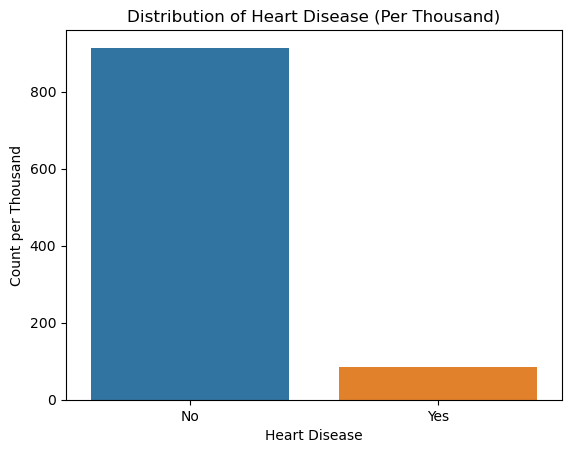

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate count per thousand of population
count_per_thousand = (Heartdisease_data['HeartDisease'].value_counts() / len(Heartdisease_data)) * 1000

# Plot the distribution with count per thousand on the y-axis
sns.barplot(x=count_per_thousand.index, y=count_per_thousand.values)
plt.title('Distribution of Heart Disease (Per Thousand)')
plt.ylabel('Count per Thousand')
plt.xlabel('Heart Disease')
plt.show()


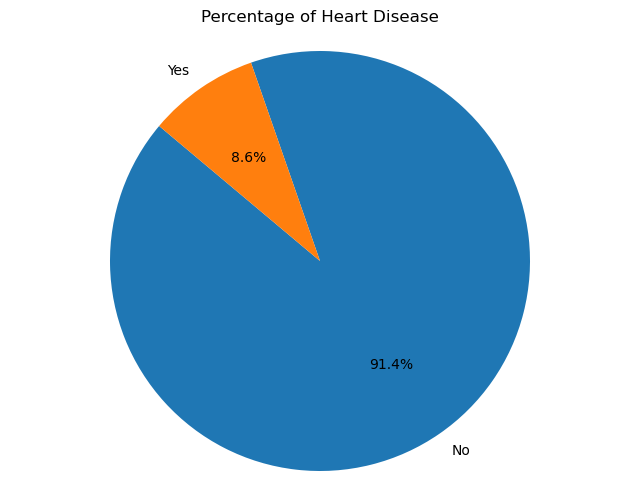

In [13]:
#visualize the percentage of heartdisease using piechart

heartdisease_counts = y.value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(heartdisease_counts, labels=heartdisease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Heart Disease')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

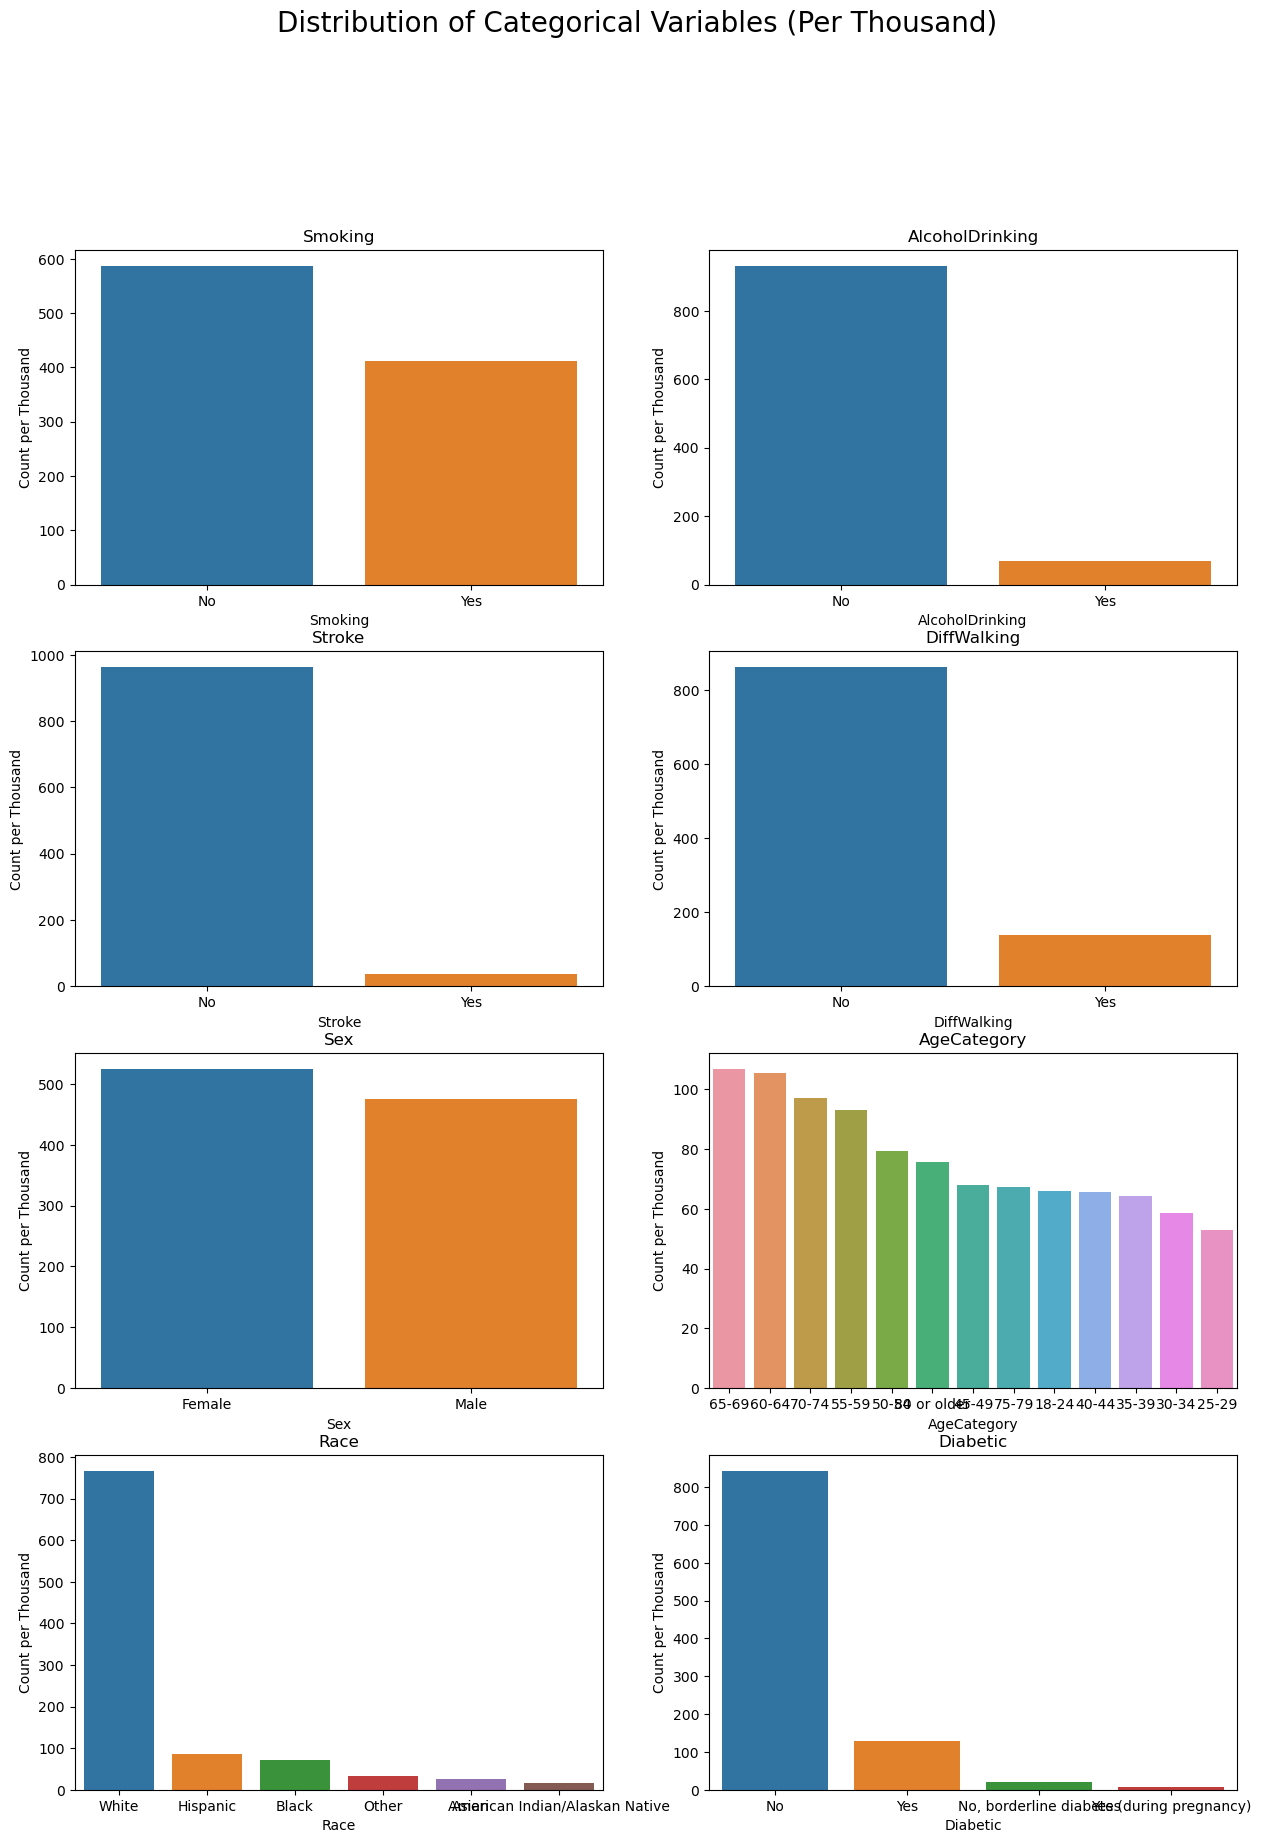

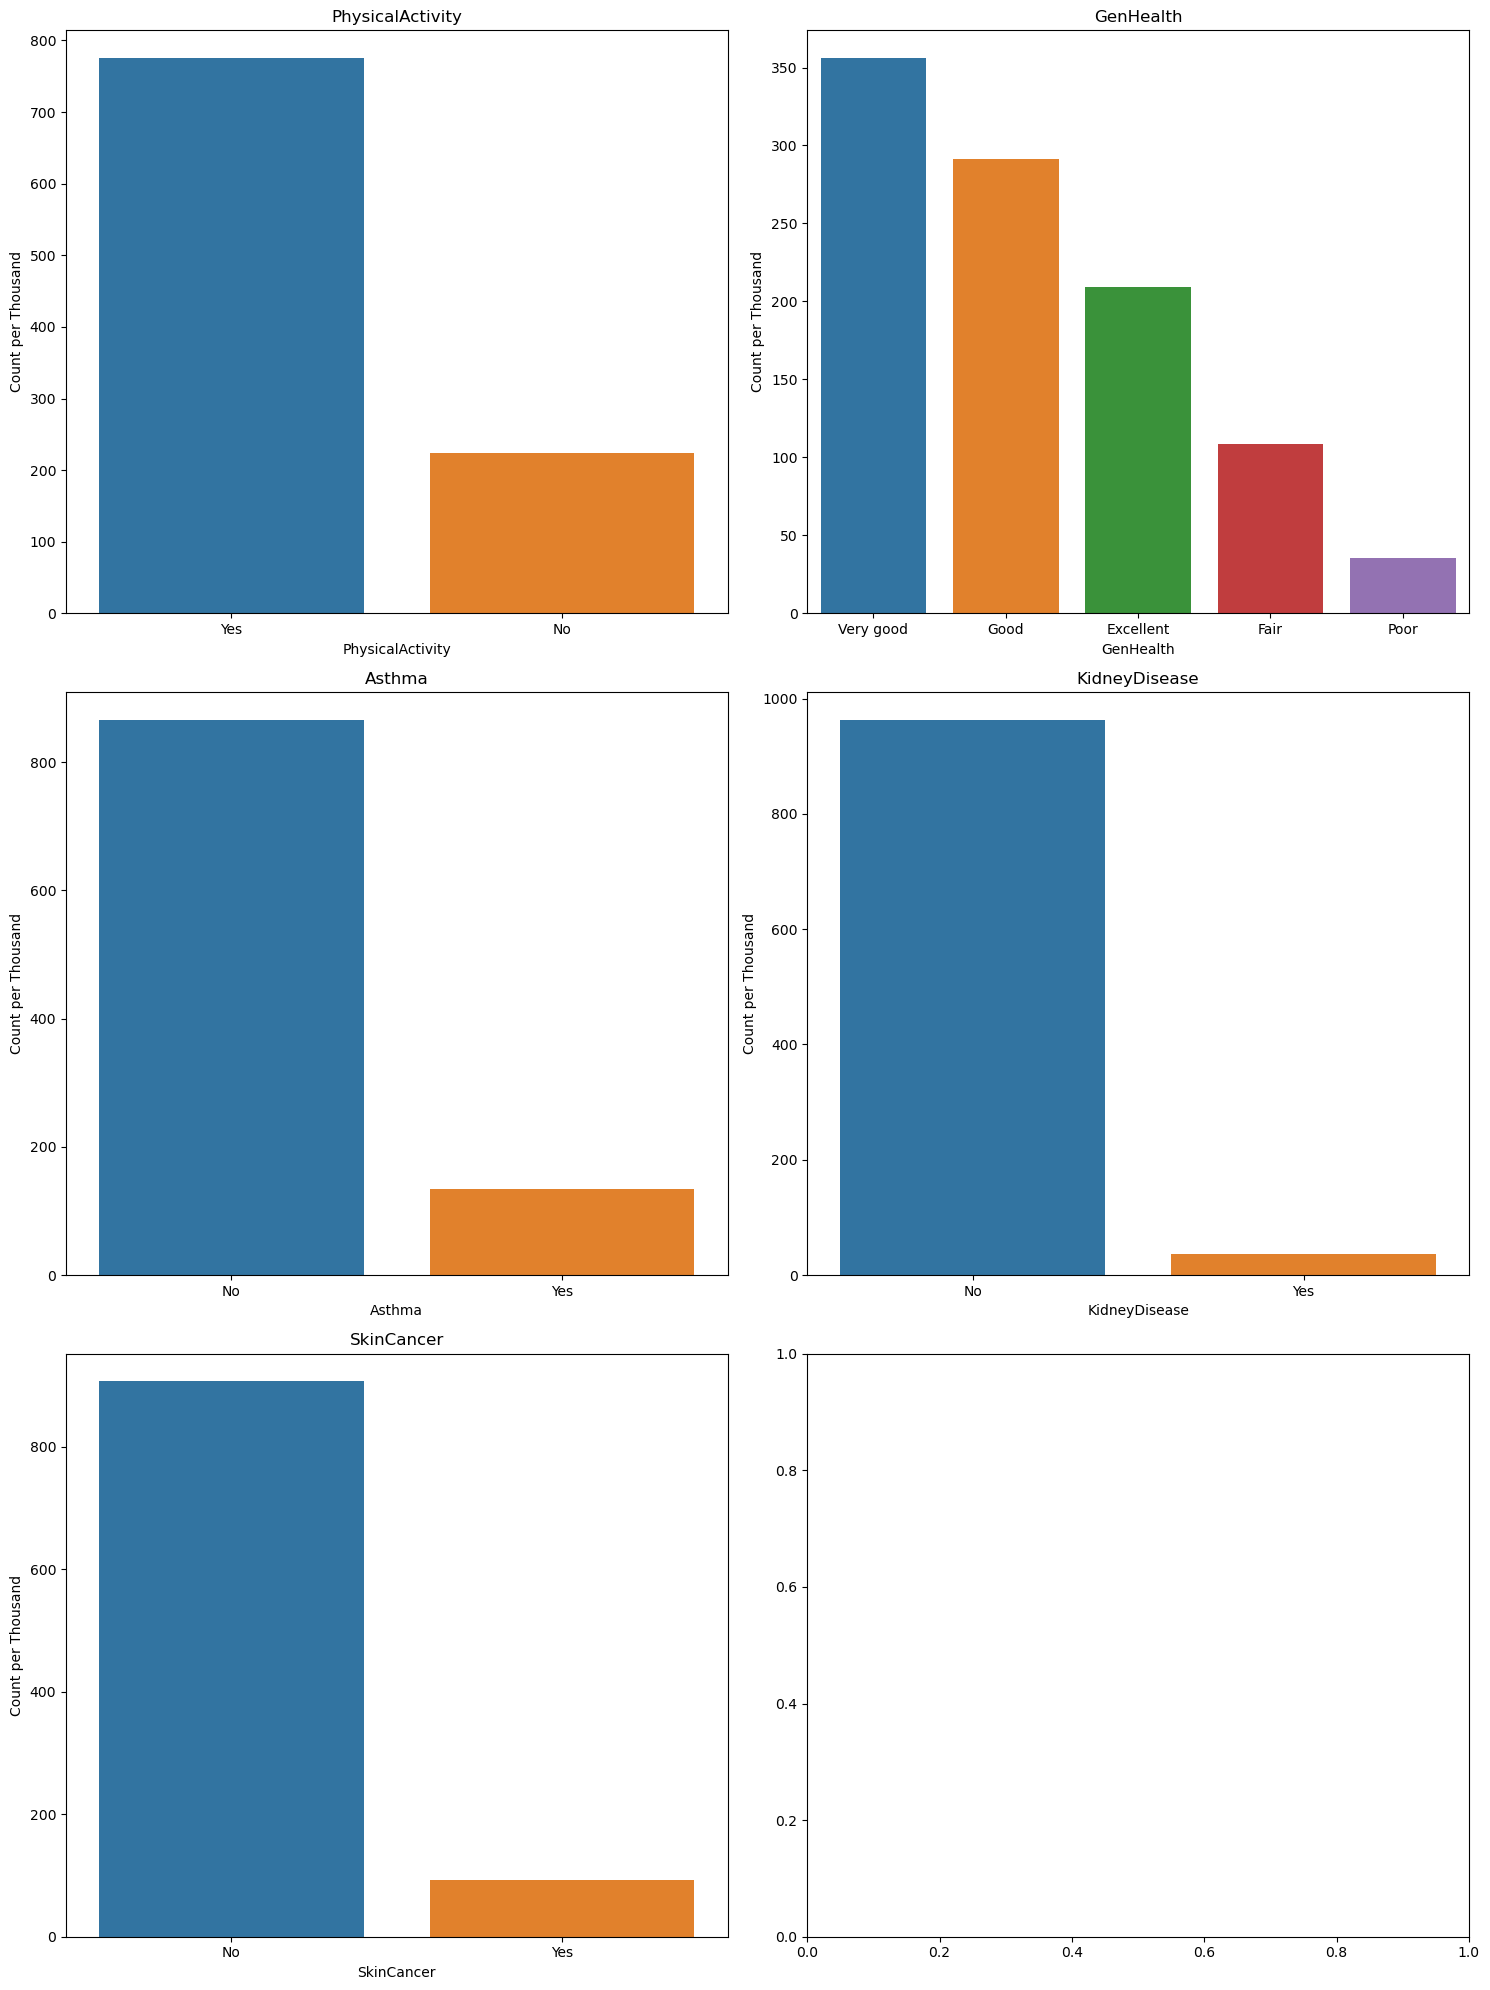

In [14]:
# Visualize all categorical variables
# Calculate count per thousand of population for each categorical variable
fig1, axes1 = plt.subplots(4, 2, figsize=(15, 20))
fig2, axes2 = plt.subplots(3, 2, figsize=(15, 20))
axes1 = axes1.ravel()
axes2 = axes2.ravel()

for i, column in enumerate(categorical_var):
    if i < 8:
        ax = axes1[i]
    else:
        ax = axes2[i - 8]

    # Calculate count per thousand
    count_per_thousand = (Heartdisease_data[column].value_counts() / len(Heartdisease_data)) * 1000

    # Plot count per thousand
    sns.barplot(x=count_per_thousand.index, y=count_per_thousand.values, ax=ax)
    ax.set_title(f"{column}")
    ax.set_xlabel(column)
    ax.set_ylabel('Count per Thousand')

fig1.suptitle("Distribution of Categorical Variables (Per Thousand)", fontsize=20, x=0.5, y=1)


plt.tight_layout()
plt.show()

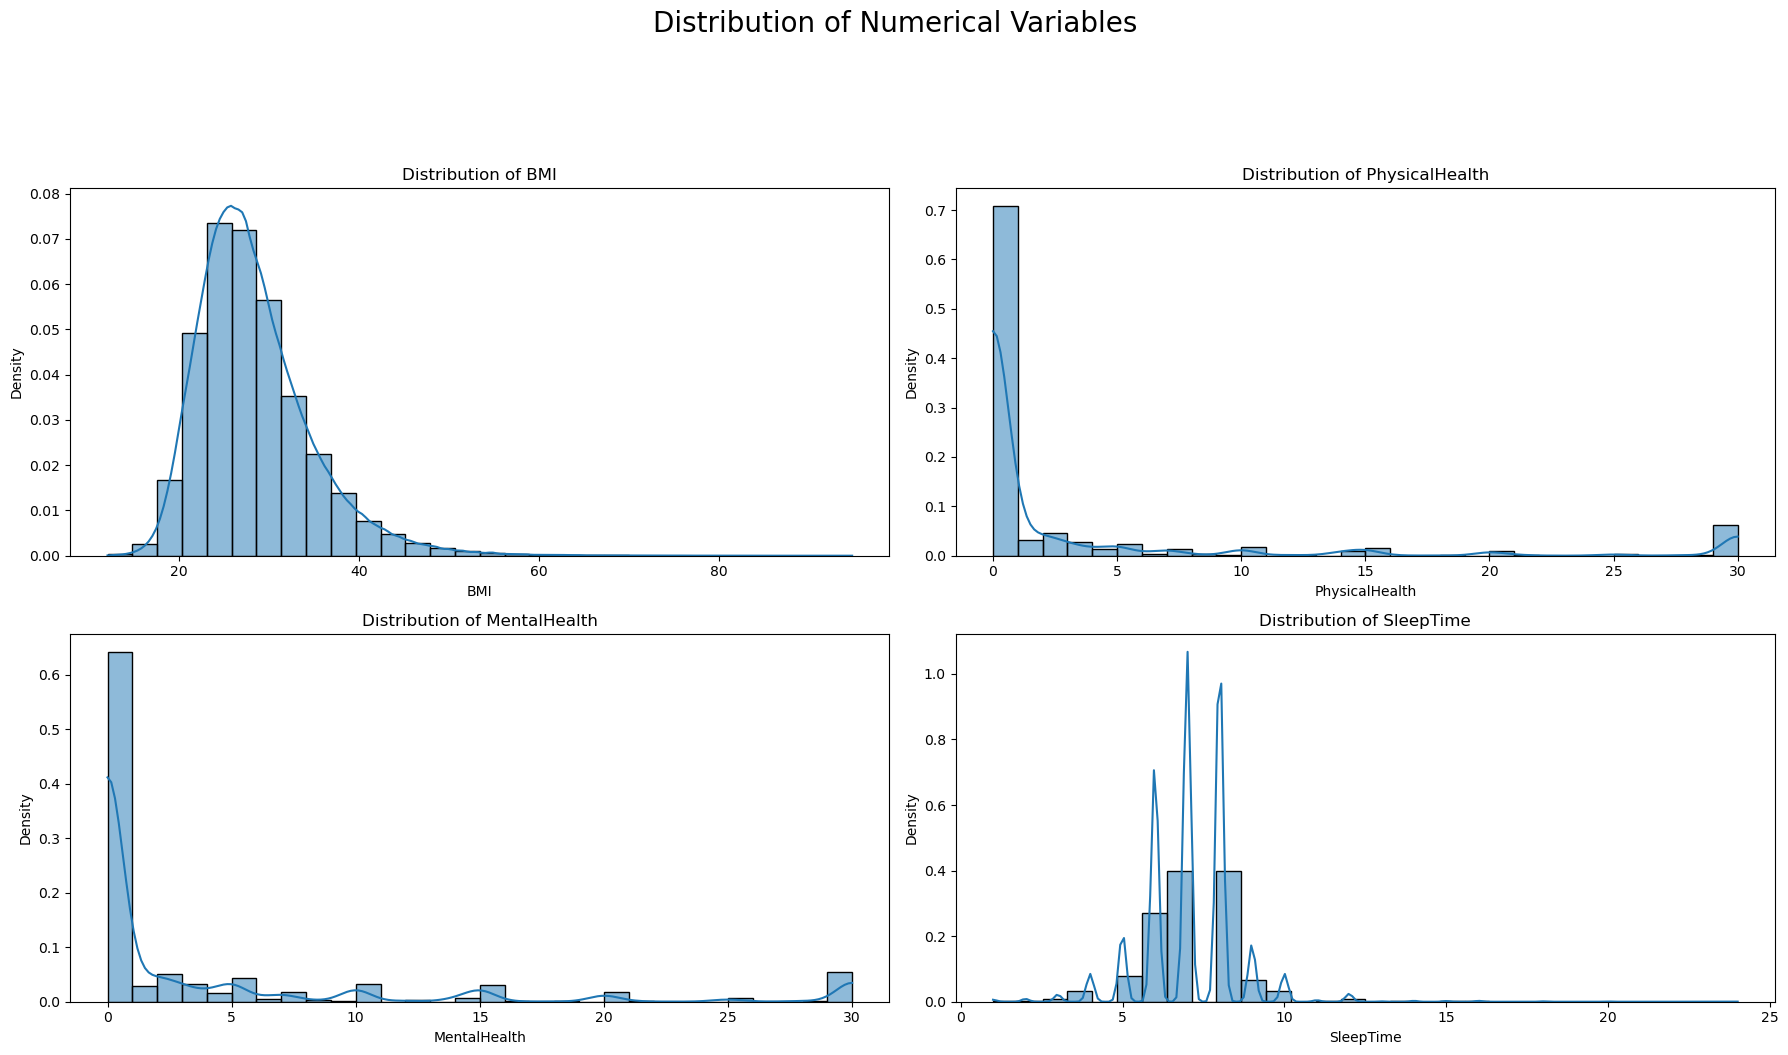

In [15]:
#visualize all numerical features
# Create a figure for plotting
plt.figure(figsize=(18, 10))

# Set a title for the entire figure
plt.suptitle("Distribution of Numerical Variables", fontsize=20, x=0.5, y=1.05)

# Loop over the list of numerical variables to create a histogram and KDE plot for each
for i, variable in enumerate(numerical_var):
    plt.subplot(2, 2, i+1)
    
    # Plot histogram with KDE
    sns.histplot(data=Heartdisease_data, x=variable, kde=True, stat='density', bins=30)
    
    # Set titles and labels
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Density")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to fit the suptitle
plt.show()

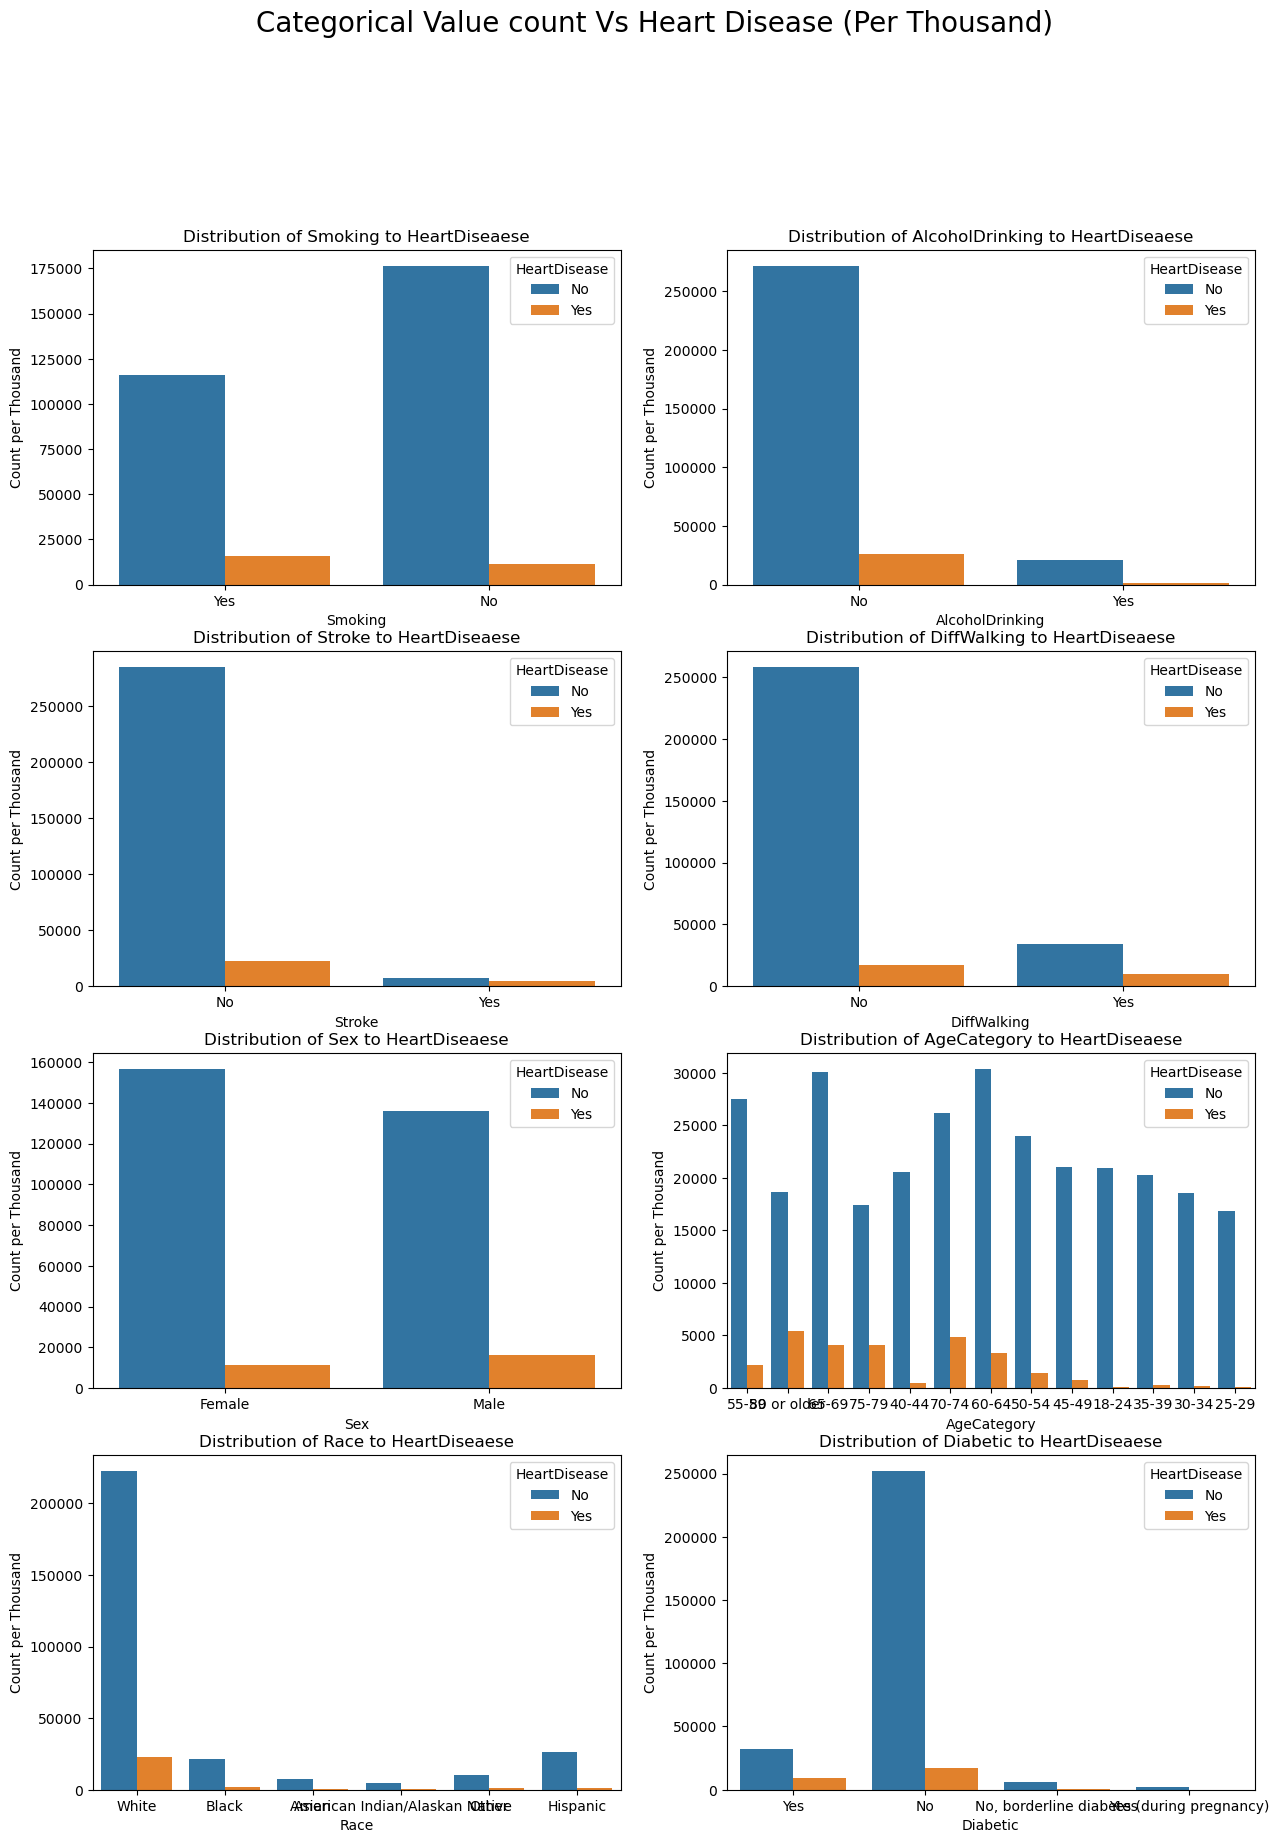

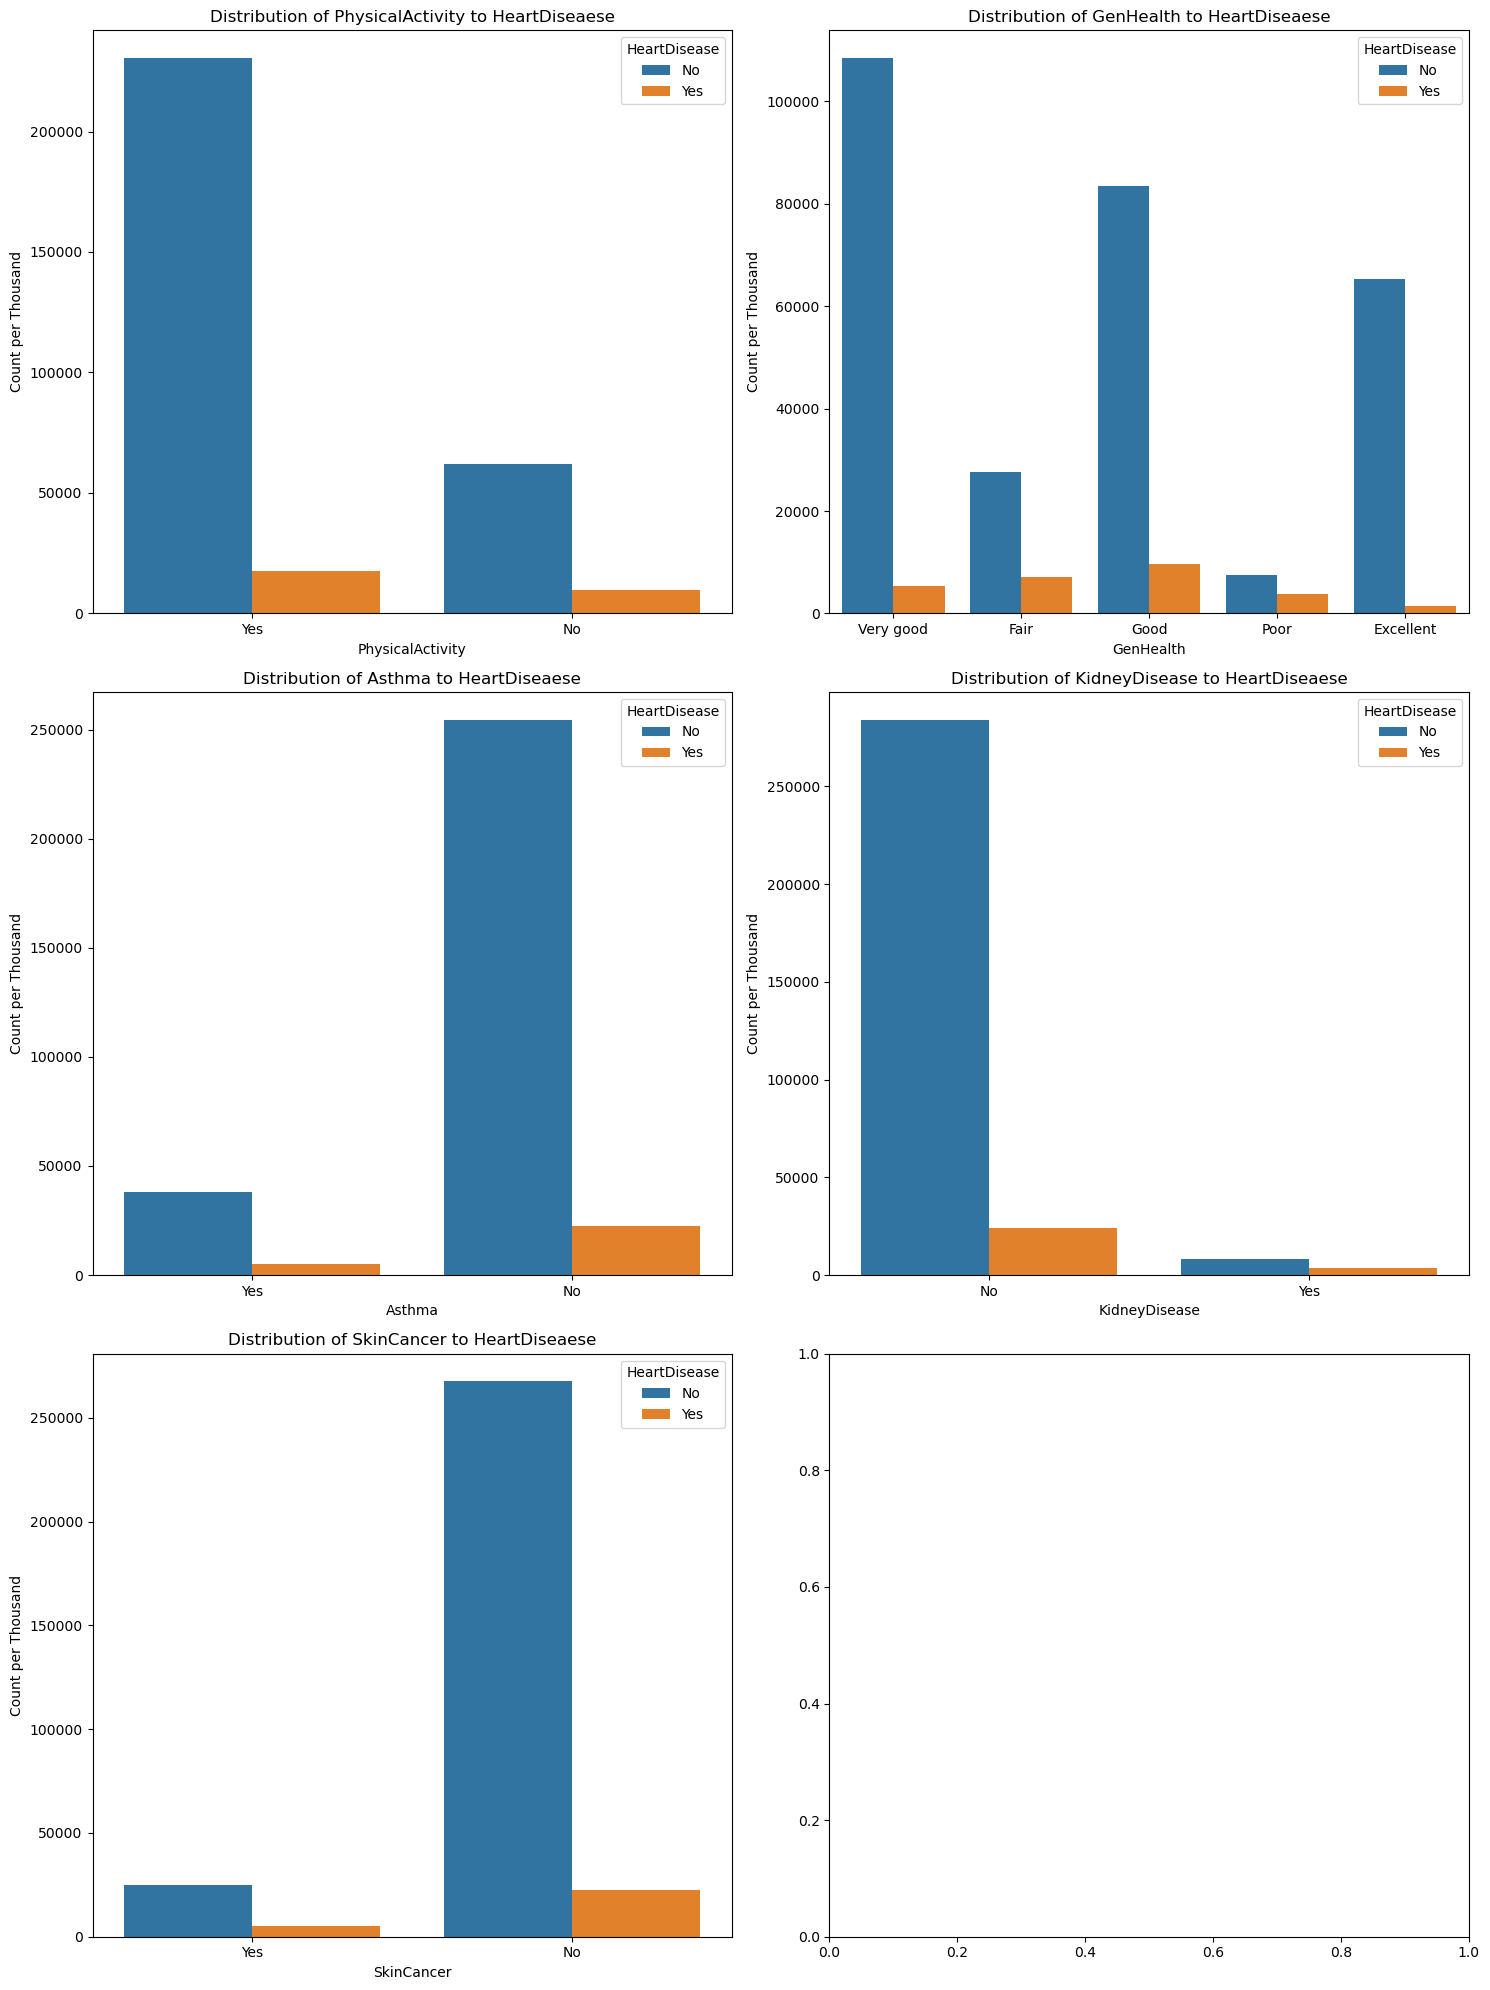

In [16]:

# Calculate count per thousand of population for each categorical variable
fig1, axes1 = plt.subplots(4, 2, figsize=(15, 20))
fig2, axes2 = plt.subplots(3, 2, figsize=(15, 20))
axes1 = axes1.ravel()
axes2 = axes2.ravel()

for i, column in enumerate(categorical_var):
    if i < 8:
        ax = axes1[i]
    else:
        ax = axes2[i - 8]


    # Calculate count per thousand
    count_per_thousand = (Heartdisease_data[column].value_counts() / len(Heartdisease_data)) * 1000

    # Plot countplot with hue
    sns.countplot(data=Heartdisease_data, x=column, hue='HeartDisease', ax=ax)
    ax.set_title(f"Distribution of {column} to HeartDiseaese")
    ax.set_ylabel("Count per Thousand")

fig1.suptitle("Categorical Value count Vs Heart Disease (Per Thousand)", fontsize=20, x=0.5, y=1)

plt.tight_layout()
plt.show()

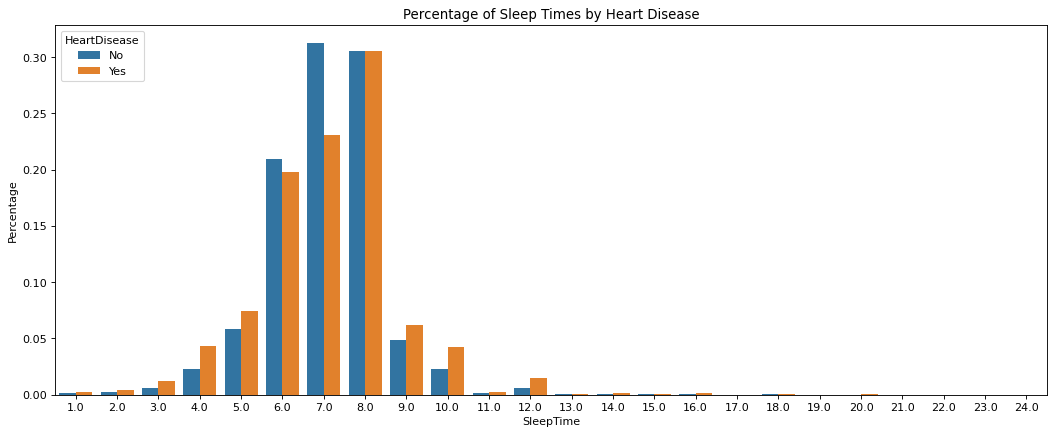

In [17]:
# Visualize relationship between sleepgtime and heartdisease
relative = Heartdisease_data.groupby('HeartDisease').SleepTime.value_counts(normalize=True).reset_index(name='Percentage')

plt.figure(figsize=(16, 6), dpi=80)
ax = sns.barplot(data=relative, x='SleepTime', y='Percentage', hue='HeartDisease');

ax.set_title("Percentage of Sleep Times by Heart Disease");

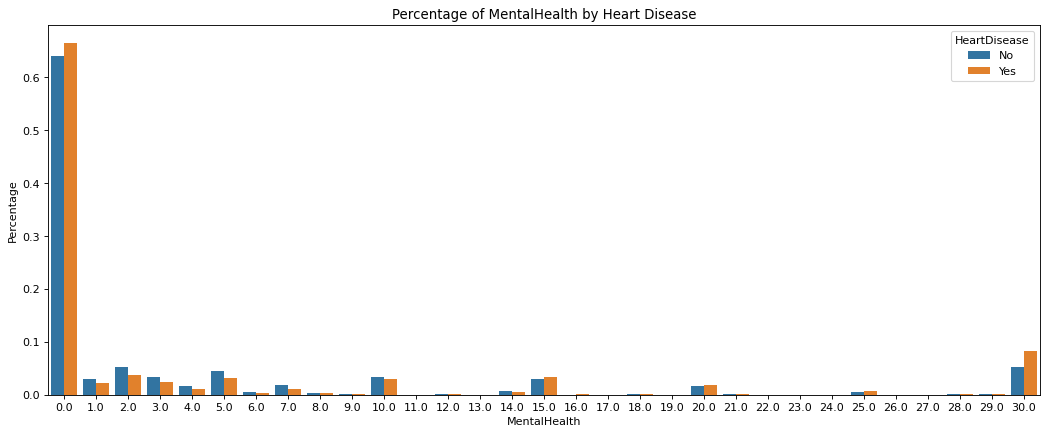

In [18]:
# Visualization of realtionship Betwwen Mental Health and Heart Disease
relative = Heartdisease_data.groupby('HeartDisease').MentalHealth.value_counts(normalize=True).reset_index(name='Percentage')

plt.figure(figsize=(16, 6), dpi=80)
ax = sns.barplot(data=relative, x='MentalHealth', y='Percentage', hue='HeartDisease');

ax.set_title("Percentage of MentalHealth by Heart Disease");

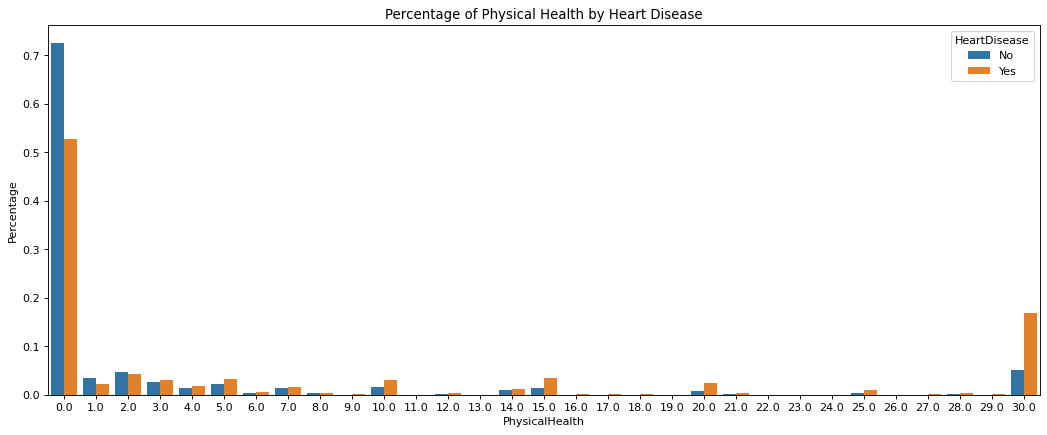

In [19]:
# Visualize relationship between Physical health and Heart disease
relative = Heartdisease_data.groupby('HeartDisease').PhysicalHealth.value_counts(normalize=True).reset_index(name='Percentage')

plt.figure(figsize=(16, 6), dpi=80)
ax = sns.barplot(data=relative, x='PhysicalHealth', y='Percentage', hue='HeartDisease');

ax.set_title("Percentage of Physical Health by Heart Disease");

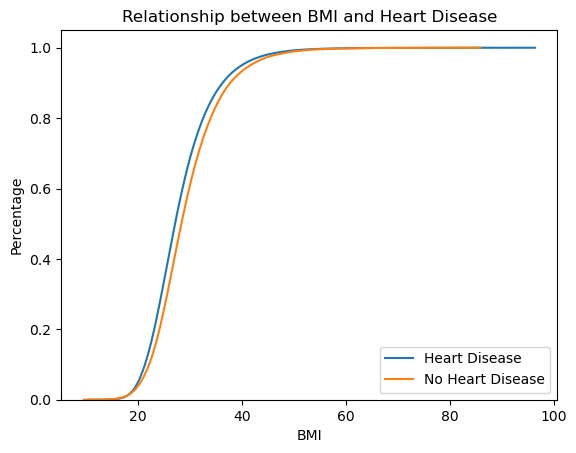

In [20]:

#Visualisation of BMI to Heart Disease 

# Filter the data for individuals with and without heart disease
heart_disease= Heartdisease_data[Heartdisease_data['HeartDisease'] == 'No']['BMI']
no_heart_disease= Heartdisease_data[Heartdisease_data['HeartDisease'] == 'Yes']['BMI']

# Plot the KDE plots for both groups with normalized y-axis
sns.kdeplot(heart_disease, label='Heart Disease', shade=False, cumulative=True, common_norm=False)
sns.kdeplot(no_heart_disease, label='No Heart Disease', shade=False, cumulative=True, common_norm=False)

# Set the title and labels
plt.title('Relationship between BMI and Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Percentage')

# Show the plot
plt.legend()
plt.show()


In [21]:
# Convert the categorical variables to ordinal encoding
encoder = OrdinalEncoder()
X[categorical_var.columns]= encoder.fit_transform(X[categorical_var.columns])

# Normalize the numerical variables using StandardScaler
scaler = StandardScaler()
X[numerical_var.columns] = scaler.fit_transform(X[numerical_var.columns])

# Concatenate the numerical and categorical variables into one DataFrame
X_transformed_df= pd.concat([X[numerical_var.columns], X[categorical_var.columns]], axis=1)


In [22]:
#view the data frame
X_transformed_df

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,-1.844750,-0.046751,3.281069,-1.460354,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,-0.067601,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
2,-0.274603,2.091388,3.281069,0.628776,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,-0.763977,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0
4,-0.726138,3.097572,-0.490039,0.628776,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977,1.0,0.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0
319791,0.238291,-0.424070,-0.490039,-1.460354,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,1.0,0.0,0.0
319792,-0.642753,-0.424070,-0.490039,-0.763977,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0
319793,0.705560,-0.424070,-0.490039,3.414282,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0


In [23]:
# Convert the y variable to numerical values using LabelEncoder
le = LabelEncoder()
# Fit and transform the numpy array
y_transformed = le.fit_transform(y)

# Create a DataFrame with the transformed data and a specified column header
# Replace 'target' with your desired column name
y_transformed_df = pd.DataFrame(y_transformed, columns=['HeartDisease'])

# Print the DataFrame
print(y_transformed_df)

        HeartDisease
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
319790             1
319791             0
319792             0
319793             0
319794             0

[319795 rows x 1 columns]


In [24]:
#fix both x and y into a singlre dataframe
Heartdisease_data_transformed = pd.concat([y_transformed_df, X_transformed_df], axis=1)

In [25]:
Heartdisease_data_transformed 

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,-0.046751,3.281069,-1.460354,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0
1,0,-1.256338,-0.424070,-0.490039,-0.067601,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
2,0,-0.274603,2.091388,3.281069,0.628776,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0,-0.647473,-0.424070,-0.490039,-0.763977,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0
4,0,-0.726138,3.097572,-0.490039,0.628776,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.144019,0.456341,-0.490039,-0.763977,1.0,0.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0
319791,0,0.238291,-0.424070,-0.490039,-1.460354,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,1.0,0.0,0.0
319792,0,-0.642753,-0.424070,-0.490039,-0.763977,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0
319793,0,0.705560,-0.424070,-0.490039,3.414282,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0


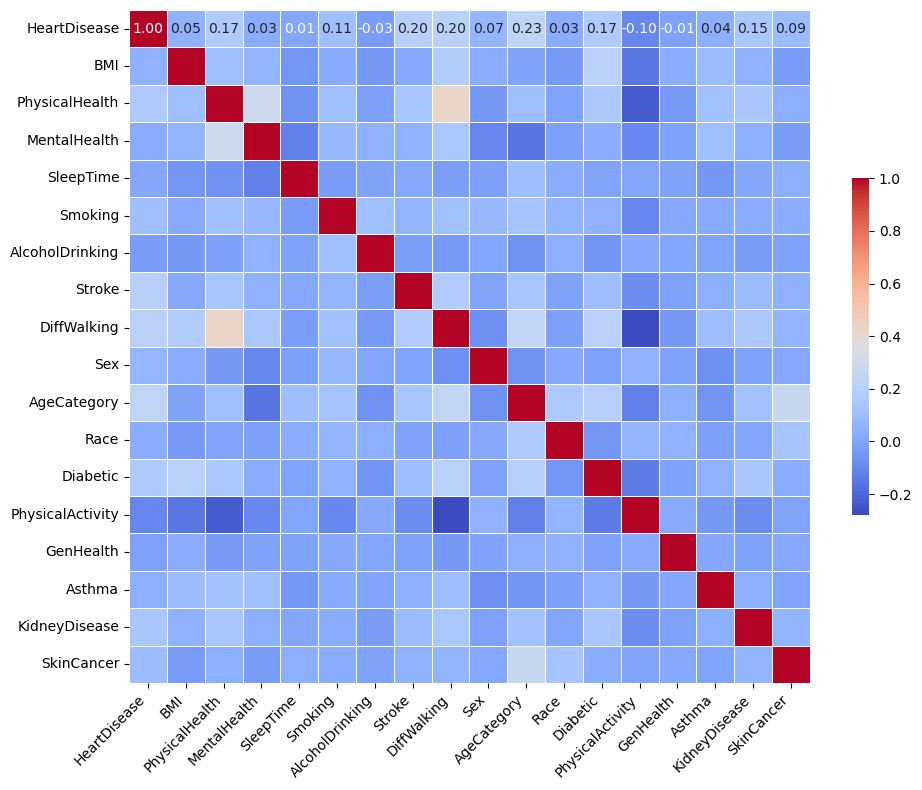

In [26]:
# Correlation Analysis of all Features

# Assuming 'Heartdisease_data_transformed' is your DataFrame
corr_matrix = Heartdisease_data_transformed.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Using matplotlib.rcParams to set font size globally
plt.rcParams.update({'font.size': 10})

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})

# Set font size for the color bar ticks
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Set font size for the ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout for better display
plt.tight_layout()

# Show the heatmap
plt.show()

In [27]:
 

# Calculate counts of each class
count_heart_disease = sum(y_transformed == 1)
count_no_heart_disease = sum(y_transformed== 0)

# Calculate percentages
total_instances = len(y_transformed)
percentage_heart_disease = (count_heart_disease / total_instances) * 100
percentage_no_heart_disease = (count_no_heart_disease / total_instances) * 100

# Display counts
print("Count of individuals with heart disease:", count_heart_disease)
print("Count of individuals without heart disease:", count_no_heart_disease)

# Display percentages
print("Percentage of individuals with heart disease:", percentage_heart_disease)
print("Percentage of individuals without heart disease:", percentage_no_heart_disease)

Count of individuals with heart disease: 27373
Count of individuals without heart disease: 292422
Percentage of individuals with heart disease: 8.559545959130068
Percentage of individuals without heart disease: 91.44045404086994


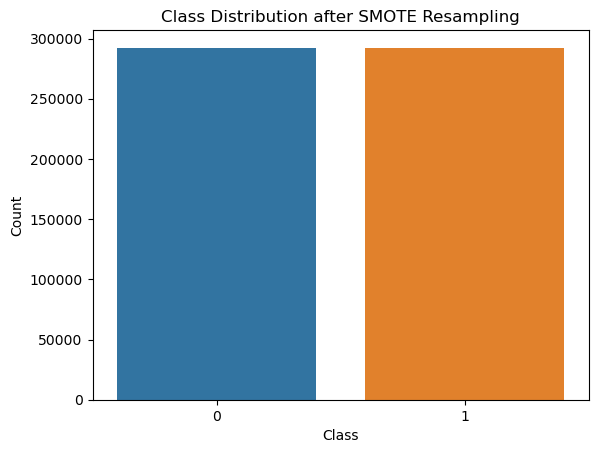

In [28]:

#Apply smote on the imbalanced dataset 
from imblearn.over_sampling import SMOTE

# Your previous code to resample the dataset
resampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = resampler.fit_resample(X_transformed_df, y_transformed)

# Now, plot the class distribution
sns.countplot(x=y_train_smote)

# Add labels and title for clarity
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE Resampling')

# Show the plot
plt.show()

In [29]:
#Recheck the count of both classes to ensure dataset is balanced

# Calculate counts
count_heart_disease = sum(y_train_smote == 1)
count_no_heart_disease = sum(y_train_smote == 0)

# Calculate percentages
total_instances = len(y_train_smote)
percentage_heart_disease = (count_heart_disease / total_instances) * 100
percentage_no_heart_disease = (count_no_heart_disease / total_instances) * 100

# Display counts
print("Count of individuals with heart disease:", count_heart_disease)
print("Count of individuals without heart disease:", count_no_heart_disease)

# Display percentages
print("Percentage of individuals with heart disease:", percentage_heart_disease)
print("Percentage of individuals without heart disease:", percentage_no_heart_disease)


Count of individuals with heart disease: 292422
Count of individuals without heart disease: 292422
Percentage of individuals with heart disease: 50.0
Percentage of individuals without heart disease: 50.0


## Feauture Selection

Feature selection techniques is performed here to identify the most relevant
features from the dataset,
reducing dimensionality and potentially improving model performance and interpretability.
Recursive feature elimiation and Feature importance was employed with decision tree and random forest as estimators respectively to select the features that contribute most to the predictive power of the model.



In [30]:
from sklearn.model_selection import train_test_split

# Splitting into train and temp sets
X_train, X_testval, y_train, y_testval = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=42)

# Splitting temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42)

# Print shapes of resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (409390, 17) (409390,)
Validation set shape: (87727, 17) (87727,)
Test set shape: (87727, 17) (87727,)


In [31]:
# Feature selection using RFE and Initialize Decision Tree as estimator
DCT = DecisionTreeClassifier(random_state=42)

# Initialize Recursive Feature Elimination (RFE)Decision tree regression estimator
rfe = RFE(estimator=DCT, n_features_to_select=10)  # Select top 10 features

# Fit RFE on the dataset
rfe.fit_transform(X_train, y_train)

# Transform the training and validation datasets and test data
X_train_rfe = rfe.transform(X_train)
X_val_rfe = rfe.transform(X_val)
X_test_rfe= rfe.transform(X_test)



# Get the mask of selected features
selected_feature_mask = rfe.support_

# Get the names of selected features from the original DataFrame
selected_features = X_train.columns[selected_feature_mask]

# Create new DataFrames for the selected features with column names
X_train_rfe_df = pd.DataFrame(X_train_rfe, columns=selected_features)
X_val_rfe_df = pd.DataFrame(X_val_rfe, columns=selected_features)
X_test_rfe_df= pd.DataFrame(X_test_rfe, columns=selected_features)

# Print selected features
print("Selected Features using RFE:")
print(selected_features)
print(f"Number of remaining features: {X_train_rfe_df.shape[1]}")

Selected Features using RFE:
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking',
       'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'GenHealth'],
      dtype='object')
Number of remaining features: 10


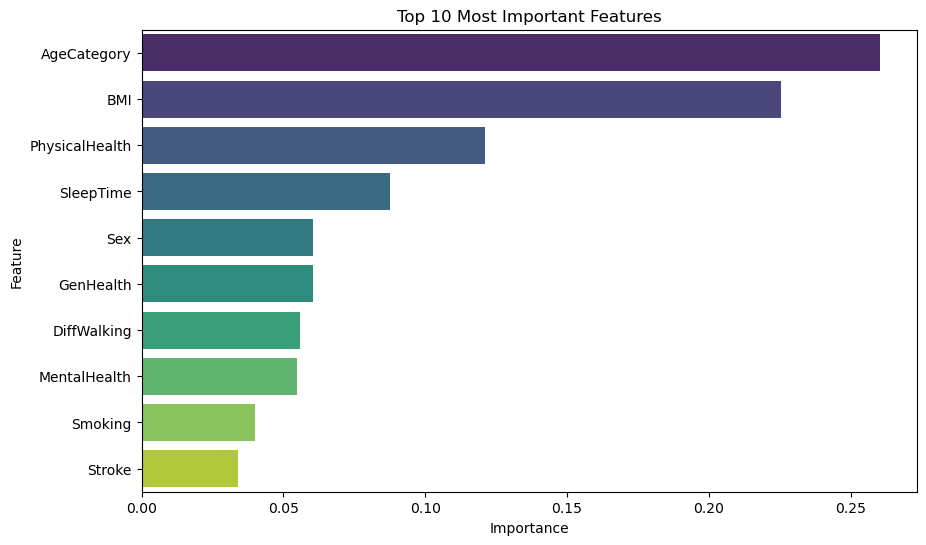

In [32]:
#visualize the most important features 
# Get feature importances
feature_importances = rfe.estimator_.feature_importances_
# Sort features and importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = selected_features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plotting the top 10 most important features in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances[:10], y=sorted_features[:10], palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_train is your feature set and y_train are the labels

# Create and fit selector
selector = SelectKBest(score_func=f_classif, k=10)
X_train_new = selector.fit_transform(X_train, y_train)

# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_feature_names = X_train.columns[selected_indices]

print("Selected Features using SelectKBest:")
print(selected_feature_names)

Selected Features using SelectKBest:
Index(['PhysicalHealth', 'Smoking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming X_train is your feature set and y_train are the labels

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order and select the top 10 indices
indices = importances.argsort()[-10:][::-1]

# Define threshold as the importance of the 10th feature
threshold = importances[indices[-1]]

# Create a SelectFromModel object with the threshold
sfm = SelectFromModel(rf, threshold=threshold)

# Train the selector
sfm.fit(X_train, y_train)

# Get a mask, or integer index, of the features selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_mask]

print("Top 10 selected features using SelectFromModel:")
print(selected_feature_names)

Top 10 selected features using SelectFromModel:
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking',
       'DiffWalking', 'Sex', 'AgeCategory', 'GenHealth'],
      dtype='object')


## Model training 

In [35]:
#Model training using Xgboost classifier as the estimator before feature selection
# Step 1: Create XGBoost classifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier to your training data
xgb_classifier.fit(X_train, y_train)

# Step 3: Evaluate the model's performance with cross-validation
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Classifier Cross-Validation Scores:", cv_scores)
print("XGBoost Classifier Mean CV Score:", cv_scores.mean())

# Step 4: Evaluate the model's performance on the validation set
y_val_pred_beforeFS = xgb_classifier.predict(X_val)
print("\nXGBoost Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred_beforeFS))

XGBoost Classifier Cross-Validation Scores: [0.91432375 0.91334669 0.91267496 0.91344439 0.91324898]
XGBoost Classifier Mean CV Score: 0.9134077529983633

XGBoost Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     43855
           1       0.94      0.89      0.91     43872

    accuracy                           0.91     87727
   macro avg       0.92      0.91      0.91     87727
weighted avg       0.92      0.91      0.91     87727



In [36]:
#Model training using Xgboost classifier  on selected features
# Step 1: Create XGBoost classifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier to your training data
xgb_classifier.fit(X_train_rfe_df, y_train)

# Step 3: Evaluate the model's performance with cross-validation
cv_scores = cross_val_score(xgb_classifier, X_train_rfe_df, y_train, cv=5, scoring='accuracy')
print("XGBoost Classifier Cross-Validation Scores:", cv_scores)
print("XGBoost Classifier Mean CV Score:", cv_scores.mean())

# Step 4: Evaluate the model's performance on the validation set
y_val_pred = xgb_classifier.predict(X_val_rfe)
print("\nXGBoost Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

XGBoost Classifier Cross-Validation Scores: [0.89702973 0.89606488 0.89607709 0.89798236 0.89709079]
XGBoost Classifier Mean CV Score: 0.8968489704194045

XGBoost Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     43855
           1       0.92      0.87      0.89     43872

    accuracy                           0.90     87727
   macro avg       0.90      0.90      0.90     87727
weighted avg       0.90      0.90      0.90     87727



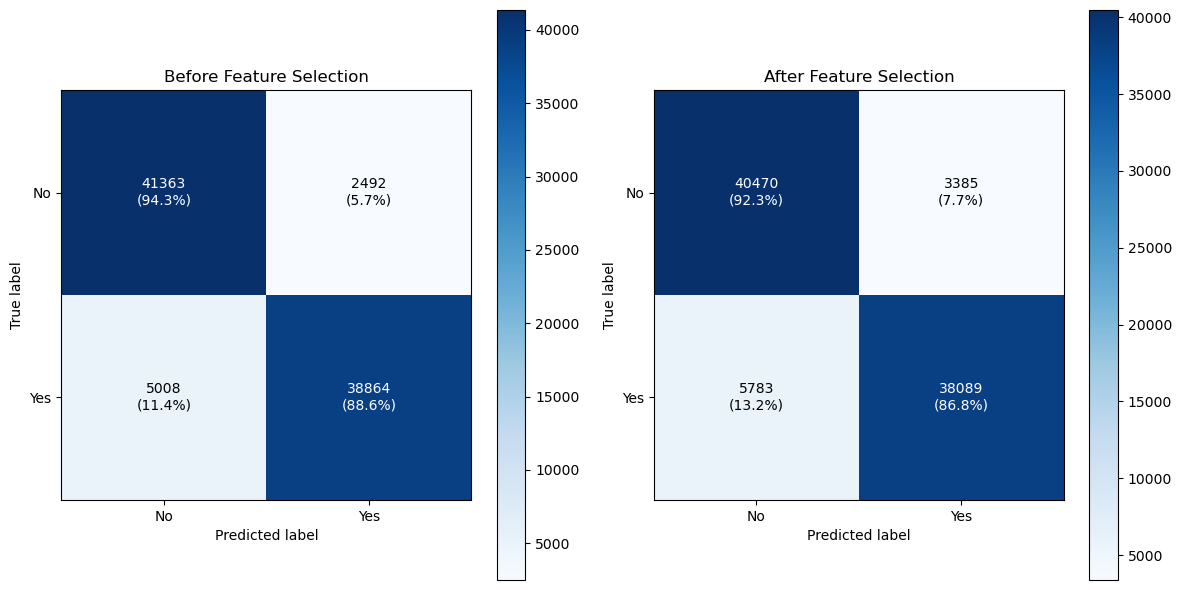

In [37]:
# Visualize using Confusion metrics
from sklearn.metrics import confusion_matrix, classification_report

def plot_dual_confusion_matrices(y_val, y_pred_before, y_pred_after, classes, title1='Before Feature Selection', title2='After Feature Selection', cmap=plt.cm.Blues):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Confusion matrices calculation
    cms = [confusion_matrix(y_val, y_pred_before), confusion_matrix(y_val, y_pred_after)]
    
    for ix, cm in enumerate(cms):
        # Calculate the percentage for each cell
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        ax = axes[ix]
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        
        # Set title and axis labels
        ax.set(title=title1 if ix == 0 else title2,
               xticks=np.arange(len(classes)),
               yticks=np.arange(len(classes)),
               xticklabels=classes, 
               yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
        
        # Loop over data dimensions and create text annotations
        fmt = 'd' # 'd' for integers
        thresh = cm.max() / 2
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    plt.show()

# Assuming y_val, y_val_pred_beforeFS, y_val_pred are the true, predicted labels before and after feature selection respectively
class_names = ['No', 'Yes']
plot_dual_confusion_matrices(y_val, y_val_pred_beforeFS, y_val_pred, classes=class_names)

In [38]:
#Model training using DecisionTree classifier before feature selection
# Step 1: Create Decision Tree classifier instance
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the classifier to your training data
dt_classifier.fit(X_train, y_train)

# Step 3: Evaluate the model's performance with cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree Classifier Cross-Validation Scores:", cv_scores)
print("Decision Tree Classifier Mean CV Score:", cv_scores.mean())

# Step 4: Evaluate the model's performance on the validation set
y_val_pred2_BeforFS = dt_classifier.predict(X_val)
print("\nDecision Tree Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred2_BeforFS))

Decision Tree Classifier Cross-Validation Scores: [0.88618432 0.88801632 0.88677056 0.88838272 0.88624539]
Decision Tree Classifier Mean CV Score: 0.8871198612569922

Decision Tree Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     43855
           1       0.89      0.89      0.89     43872

    accuracy                           0.89     87727
   macro avg       0.89      0.89      0.89     87727
weighted avg       0.89      0.89      0.89     87727



In [39]:
#Model training using DecisionTree classifier after feature selection
# Step 1: Create Decision Tree classifier instance
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the classifier to your training data
dt_classifier.fit(X_train_rfe_df, y_train)

# Step 3: Evaluate the model's performance with cross-validation
cv_scores = cross_val_score(dt_classifier, X_train_rfe_df, y_train, cv=5, scoring='accuracy')
print("Decision Tree Classifier Cross-Validation Scores:", cv_scores)
print("Decision Tree Classifier Mean CV Score:", cv_scores.mean())

# Step 4: Evaluate the model's performance on the validation set
y_val_pred2 = dt_classifier.predict(X_val_rfe)
print("\nDecision Tree Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred2))


Decision Tree Classifier Cross-Validation Scores: [0.87249322 0.87397103 0.87404431 0.87472825 0.87383668]
Decision Tree Classifier Mean CV Score: 0.8738146999193923

Decision Tree Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     43855
           1       0.89      0.87      0.88     43872

    accuracy                           0.88     87727
   macro avg       0.88      0.88      0.88     87727
weighted avg       0.88      0.88      0.88     87727



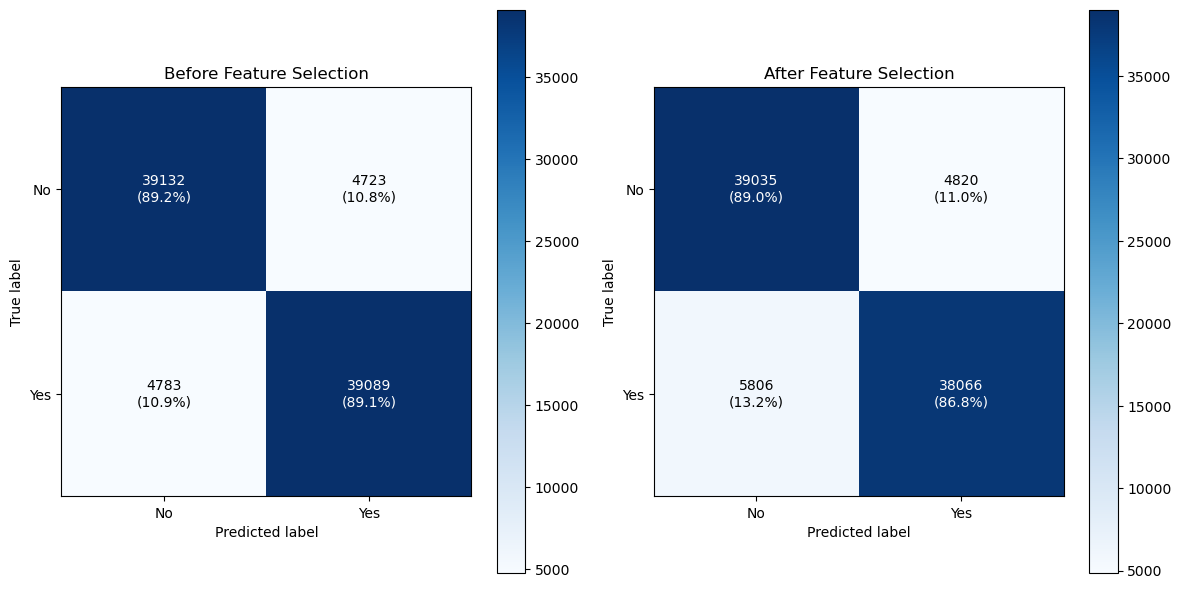

In [40]:
#plot the confusion metrics for full dataset and selected dataset

def plot_dual_confusion_matrices(y_val, y_pred_before, y_pred_after, classes, title1='Before Feature Selection', title2='After Feature Selection', cmap=plt.cm.Blues):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Confusion matrices calculation
    cms = [confusion_matrix(y_val, y_pred_before), confusion_matrix(y_val, y_pred_after)]
    
    for ix, cm in enumerate(cms):
        # Calculate the percentage for each cell
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        ax = axes[ix]
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        
        # Set title and axis labels
        ax.set(title=title1 if ix == 0 else title2,
               xticks=np.arange(len(classes)),
               yticks=np.arange(len(classes)),
               xticklabels=classes, 
               yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
        
        # Loop over data dimensions and create text annotations
        fmt = 'd' # 'd' for integers
        thresh = cm.max() / 2
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    plt.show()

# Assuming y_val, y_val_pred2_BeforFS, and y_val_pred2 are the true label, predicted labels before and after feature selection respectively
class_names = ['No', 'Yes']
plot_dual_confusion_matrices(y_val, y_val_pred2_BeforFS, y_val_pred2, classes=class_names)

In [41]:
#Model training using RandomForest classifier before feature selection
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_val_pred3_BeforeFs = RFC.predict(X_val)

# Evaluate the model's performance with cross-validation
cv_scores = cross_val_score(dt_classifier, X_train_rfe_df, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores)
print("Decision Tree Classifier Mean CV Score:", cv_scores.mean())

print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred3_BeforeFs))

Random Forest Cross-Validation Scores: [0.87249322 0.87397103 0.87404431 0.87472825 0.87383668]
Decision Tree Classifier Mean CV Score: 0.8738146999193923
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     43855
           1       0.94      0.91      0.93     43872

    accuracy                           0.93     87727
   macro avg       0.93      0.93      0.93     87727
weighted avg       0.93      0.93      0.93     87727



In [42]:

# Create and fit the RandomForest classifier instance with the reduced feature set
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train_rfe, y_train)  # Ensure X_train_rfe is the correct training set with selected features

# Step 2: Evaluate the model's performance with cross-validation on the reduced feature set
cv_scores_rfc = cross_val_score(RFC, X_train_rfe, y_train, cv=5, scoring='accuracy')
print("Random Forest Classifier Cross-Validation Scores:", cv_scores_rfc)
print("Random Forest Classifier Mean CV Score:", cv_scores_rfc.mean())

# Step 3: Make predictions on the validation set using the reduced feature set
y_val_pred3 = RFC.predict(X_val_rfe)  # Ensure X_val_rfe is the correct validation set with selected features

# Step 4: Evaluate the model's performance on the validation set
print("Random Forest Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred3))

Random Forest Classifier Cross-Validation Scores: [0.89478248 0.89709079 0.89519773 0.898019   0.89533208]
Random Forest Classifier Mean CV Score: 0.8960844182808568
Random Forest Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     43855
           1       0.91      0.88      0.90     43872

    accuracy                           0.90     87727
   macro avg       0.90      0.90      0.90     87727
weighted avg       0.90      0.90      0.90     87727



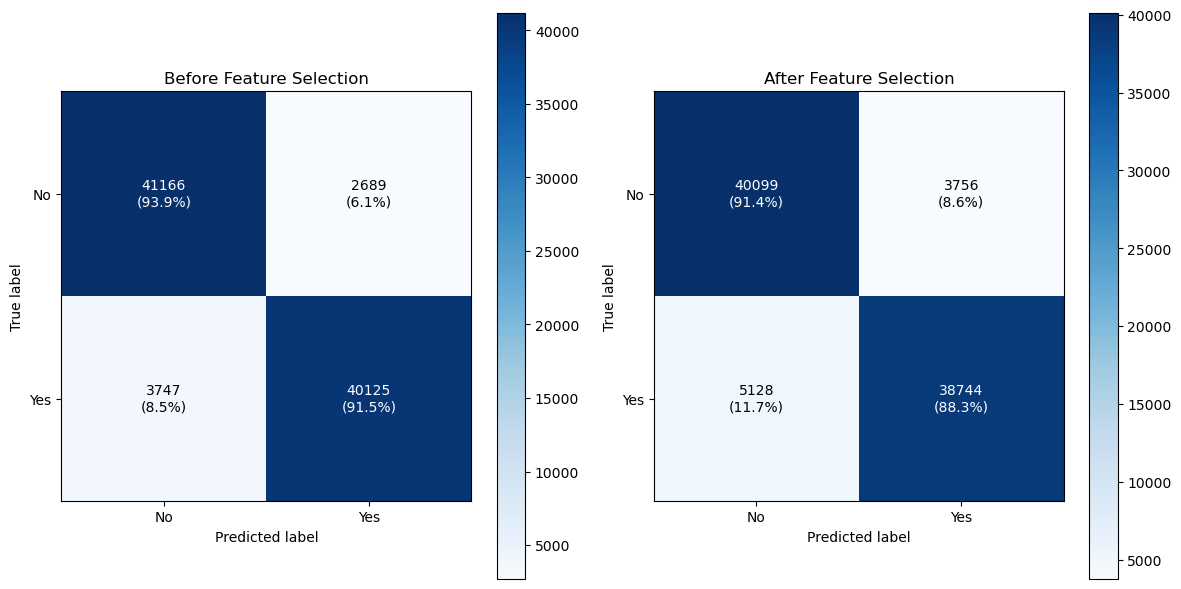

In [43]:
# Visualize result using confusion Metrics
def plot_dual_confusion_matrices(y_val, y_pred_before, y_pred_after, classes, title1='Before Feature Selection', title2='After Feature Selection', cmap=plt.cm.Blues):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Confusion matrices calculation
    cms = [confusion_matrix(y_val, y_pred_before), confusion_matrix(y_val, y_pred_after)]
    
    for ix, cm in enumerate(cms):
        # Calculate the percentage for each cell
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        ax = axes[ix]
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        
        # Set title and axis labels
        ax.set(title=title1 if ix == 0 else title2,
               xticks=np.arange(len(classes)),
               yticks=np.arange(len(classes)),
               xticklabels=classes, 
               yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
        
        # Loop over data dimensions and create text annotations
        fmt = 'd' # 'd' for integers
        thresh = cm.max() / 2
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    plt.show()

# Assuming y_val, y_val_pred3_BeforeFs, and y_val_pred3 are the true label, predicted labels before and after feature selection respectively
class_names = ['No', 'Yes'] 
plot_dual_confusion_matrices(y_val, y_val_pred3_BeforeFs, y_val_pred3, classes=class_names)

## Hyper Parameter Tuning


In [44]:
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report

# Create a classifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Hyperparameter distribution for XGBoost
xgb_param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10)
}

# Running randomized search
xgb_random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)
xgb_random_search.fit(X_train_rfe_df, y_train)

# Best parameters from randomized search
print("Best Parameters for XGBoost Classifier:", xgb_random_search.best_params_)

# Get the best model
best_xgb_model = xgb_random_search.best_estimator_

# Evaluate the best model with cross-validation
cv_scores = cross_val_score(best_xgb_model, X_train_rfe_df, y_train, cv=5)
print("XGBoost Classifier Cross-Validation Scores:", cv_scores)
print("XGBoost Classifier Mean CV Score:", cv_scores.mean())

# Evaluate on validation set
y_val_predH = best_xgb_model.predict(X_val_rfe_df)  # make sure X_val_rfe_df is the validation set with selected features

print("\nXGBoost Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_predH))

Best Parameters for XGBoost Classifier: {'colsample_bytree': 0.786705157299192, 'learning_rate': 0.26798212202089616, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 266, 'subsample': 0.6053059844639466}
XGBoost Classifier Cross-Validation Scores: [0.90059601 0.89909377 0.89993649 0.90181734 0.9004006 ]
XGBoost Classifier Mean CV Score: 0.9003688414470309

XGBoost Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     43855
           1       0.92      0.87      0.90     43872

    accuracy                           0.90     87727
   macro avg       0.90      0.90      0.90     87727
weighted avg       0.90      0.90      0.90     87727



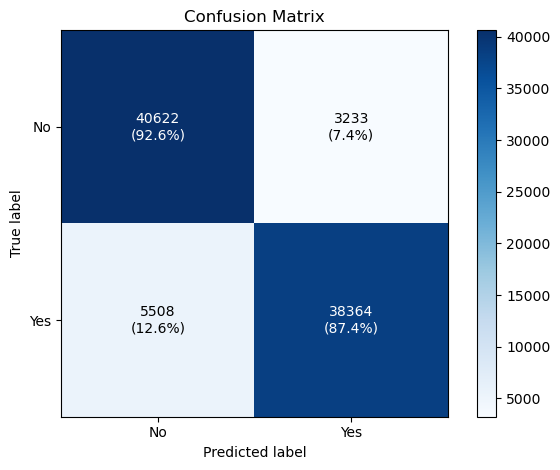

In [45]:
#Visualize using Confusion Metrics

def plot_confusion_matrix(y_val, y_val_predH, classes, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_val_predH)
    # Calculate the percentage for each cell
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks and label them with the respective list entries
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations
    fmt = 'd' # 'd' for integers
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

    fig.tight_layout()
    return ax

# Assuming y_true and y_pred are the true and predicted labels respectively
class_names = ['No', 'Yes']
plot_confusion_matrix(y_val, y_val_predH, classes=class_names, title='Confusion Matrix')

plt.show()

In [46]:
#Hyper parameter tuning on Random forest classifier

RFC = RandomForestClassifier(random_state=42)
# Hyperparameter tuning for Random Forest
RFC_param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

RFC_random_search = RandomizedSearchCV(
    RFC,
    param_distributions=RFC_param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)

RFC_random_search.fit(X_train_rfe_df, y_train)

# Best parameters
print("Best Parameters for Random Forest Classifier:", RFC_random_search.best_params_)

# Calculate cross-validation scores for RFC
cv_scores_rfc = cross_val_score(RFC_random_search.best_estimator_, X_train_rfe_df, y_train, cv=5)

# Evaluate on validation set
y_val_pred5 = RFC_random_search.predict(X_val_rfe)

print("Random Forest Classifier Cross-Validation Scores:", cv_scores_rfc)
print("Random Forest Classifier Mean CV Score:", cv_scores_rfc.mean())
print("\nRandom Forest Classifier Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred5))

Best Parameters for Random Forest Classifier: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 202}
Random Forest Classifier Cross-Validation Scores: [0.813674   0.8130267  0.81186644 0.81289235 0.81649527]
Random Forest Classifier Mean CV Score: 0.8135909523925842

Random Forest Classifier Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     43855
           1       0.79      0.85      0.82     43872

    accuracy                           0.81     87727
   macro avg       0.81      0.81      0.81     87727
weighted avg       0.81      0.81      0.81     87727



## Model Explanability 
For model explainabilty, shap and lime techniques will be used to explain the final model.

Final model used for the training is the XgBoost classifier.


In [47]:
#view the final selected features used for the model training
X_train_rfe_df.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,Stroke,DiffWalking,Sex,AgeCategory,GenHealth
0,-0.439798,-0.424070,-0.490039,0.628776,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,-1.070689,-0.424070,3.029662,0.628776,1.000000,0.000000,0.000000,1.000000,10.000000,2.000000
2,-0.892907,-0.424070,-0.490039,0.628776,0.000000,1.000000,0.000000,1.000000,11.000000,4.000000
3,-0.944826,-0.424070,-0.490039,-0.067601,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
4,-0.187995,-0.424070,-0.490039,-0.352048,0.000000,0.000000,0.000000,0.591532,2.000000,0.000000
5,0.156471,-0.424070,-0.350731,-0.067601,1.000000,0.000000,1.000000,0.000000,9.778355,2.000000
6,0.633935,-0.424070,-0.490039,-0.067601,0.000000,1.000000,0.825588,0.174412,12.000000,1.174412
7,0.243431,-0.303429,3.255422,-2.824690,0.040806,0.959194,0.959194,0.000000,5.959194,0.000000
8,0.524631,1.462524,-0.490039,-0.067601,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
9,2.033420,-0.424070,-0.490039,0.628776,1.000000,0.000000,0.000000,1.000000,10.000000,2.000000


In [48]:
#import shap
import shap
shap.initjs()

In [49]:
# Create the SHAP explainer object with the final model
explainer = shap.TreeExplainer(best_xgb_model)

In [50]:
# Calculate SHAP values - this may take some time depending on your dataset size and model complexity
shap_values = explainer.shap_values(X_train_rfe_df.values)

In [51]:
# Select a single instance (e.g., the first row of the training data)
single_instance = X_train_rfe_df.iloc[0:1]

# Calculate SHAP values for this single instance
shap_values_single = explainer.shap_values(single_instance)


# Plot the SHAP values for the single instance
shap.force_plot(explainer.expected_value, shap_values_single, single_instance)

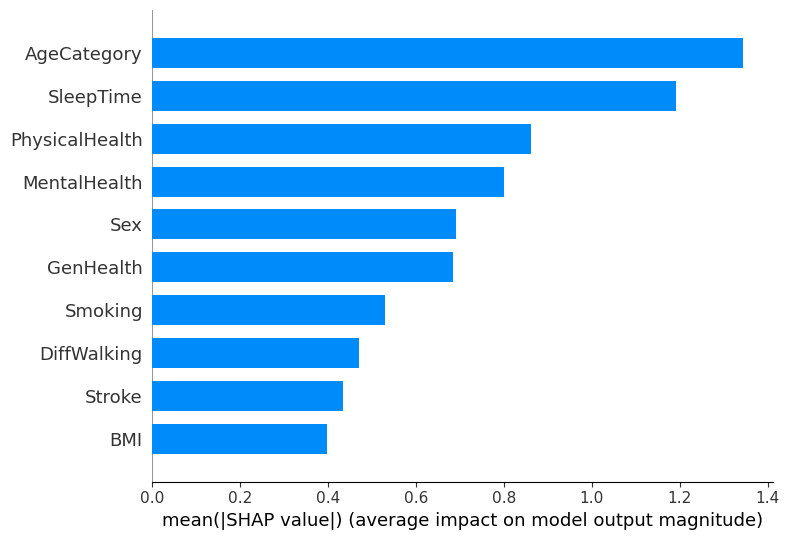

In [52]:
# Visualize the SHAP values for the first 10 observations
shap.summary_plot(shap_values, X_train_rfe_df, plot_type="bar")

In [53]:

#save final model into a PKL format 
from joblib import dump, load

dump(best_xgb_model, 'Final_HD_Prediction_Model.pkl')

['Final_HD_Prediction_Model.pkl']

In [54]:
##Load saved model and make predictions on unseen/future data

model = load('Final_HD_Prediction_Model.pkl')


In [55]:
#view the sahpe of the final test data
X_test_rfe_df.shape

(87727, 10)

In [56]:

## Get class probabilities for each instance in the test set
prob_predictions = model.predict_proba(X_test_rfe_df)

# Predict the labels for the test set
Class_prediction = model.predict(X_test_rfe_df)



In [57]:
#Display the result of probability predictions
print("Probability Predictions:")
print(prob_predictions)

# Display the first few rows of class predictions
print("\nClass Predictions:")
print(Class_prediction)


Probability Predictions:
[[3.5762787e-06 9.9999642e-01]
 [9.2133862e-01 7.8661382e-02]
 [7.1006840e-01 2.8993160e-01]
 ...
 [5.4696548e-01 4.5303452e-01]
 [2.3484230e-05 9.9997652e-01]
 [9.7408420e-01 2.5915826e-02]]

Class Predictions:
[1 0 0 ... 0 1 0]


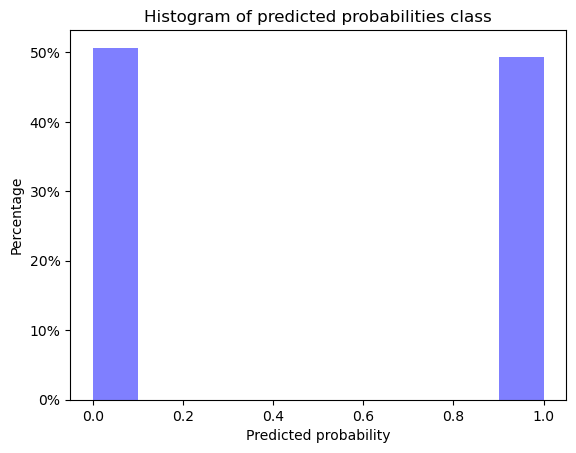

In [58]:
## Predict target values on test data
test_preds = np.where(prob_predictions  > 0.45, 1, 0) 

probability_prediction_Positive = test_preds[:, 1]  # Probabilities of the positive class

# Calculate the number of instances to normalize the histogram
n_instances = len(probability_prediction_Positive)

plt.hist(probability_prediction_Positive, bins=10, weights=np.ones(n_instances) / n_instances, alpha=0.5, color='blue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))  # Format y-axis as percentages
plt.title('Histogram of predicted probabilities class')
plt.xlabel('Predicted probability')
plt.ylabel('Percentage')
plt.show()

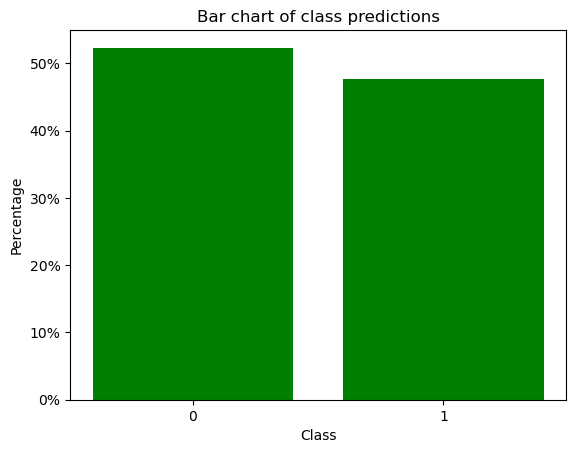

In [59]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the predicted classes
class_counts = Counter(Class_prediction)

# Convert counts to percentagesxis
total_predictions = sum(class_counts.values())
class_percentages = {k: (v / total_predictions) for k, v in class_counts.items()}

# Bar chart
plt.bar(class_percentages.keys(), class_percentages.values(), color='green')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))  # Format y-axis as percentages
plt.title('Bar chart of class predictions')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(list(class_counts.keys()))  # Ensure all class labels are displayed on the x-a
plt.show()

In [60]:

## Test set metrics

confusion_matrix(y_test, Class_prediction)
print(classification_report(y_test, Class_prediction))




              precision    recall  f1-score   support

           0       0.88      0.93      0.90     43721
           1       0.92      0.88      0.90     44006

    accuracy                           0.90     87727
   macro avg       0.90      0.90      0.90     87727
weighted avg       0.90      0.90      0.90     87727



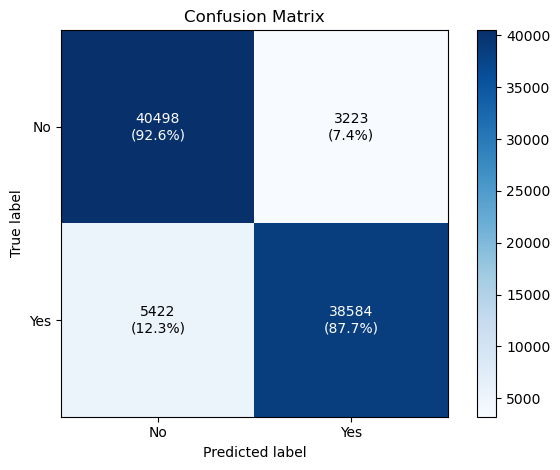

In [61]:

def plot_confusion_matrix(y_test, Class_prediction, classes, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, Class_prediction)
    # Calculate the percentage for each cell
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks and label them with the respective list entries
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations
    fmt = 'd' # 'd' for integers
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

    fig.tight_layout()
    return ax

# Assuming y_true and y_pred are the true and predicted labels respectively
class_names = ['No', 'Yes']
plot_confusion_matrix(y_test, Class_prediction, classes=class_names, title='Confusion Matrix')

plt.show()

In [62]:

test = X_test_rfe_df.copy()

#Add the predictions to the DataFrame
test['predicted_class'] = Class_prediction

#Add probabilities for the positive class
test['probability_positive_class'] = prob_predictions[:, 1]  # Index 1 for positive class


In [63]:
# Display the first few rows of the test DataFrame with the new columns
print(test.head())

        BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking  Stroke  \
0  1.496523        3.349118      3.281069   1.132807      1.0     0.0   
1  1.945316       -0.424070     -0.490039   0.628776      0.0     0.0   
2  1.078411       -0.424070     -0.490039   0.628776      0.0     0.0   
3 -0.523632       -0.424070     -0.490039   0.715534      0.0     0.0   
4 -0.889761       -0.172524     -0.490039   2.021529      0.0     0.0   

   DiffWalking       Sex  AgeCategory  GenHealth  predicted_class  \
0          1.0  0.276209     8.000000        3.0                1   
1          0.0  1.000000     6.000000        2.0                0   
2          0.0  1.000000     9.000000        4.0                0   
3          0.0  0.000000     5.875415        0.0                1   
4          0.0  0.000000     2.000000        2.0                0   

   probability_positive_class  
0                    0.999996  
1                    0.078661  
2                    0.289932  
3                 

In [64]:
print(test.tail())

            BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking  Stroke  \
87722 -1.538802       -0.424070     -0.444312  -1.460354      0.0     0.0   
87723 -0.883467       -0.424070     -0.490039  -0.067601      0.0     1.0   
87724 -0.266736       -0.424070     -0.490039  -0.067601      1.0     0.0   
87725 -0.714299       -0.378071     -0.490039   0.187082      0.0     0.0   
87726  1.029658       -0.424070     -0.490039  -0.067601      0.0     0.0   

       DiffWalking  Sex  AgeCategory  GenHealth  predicted_class  \
87722          0.0  0.0         12.0        4.0                1   
87723          0.0  1.0         12.0        0.0                0   
87724          0.0  1.0         11.0        4.0                0   
87725          0.0  0.0         11.0        4.0                1   
87726          0.0  0.0          2.0        4.0                0   

       probability_positive_class  
87722                    0.999793  
87723                    0.415216  
87724               